In [1]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE  # Técnica de Oversampling

In [3]:
# 1. Carregamento dos Dados
df_credit = pd.read_csv('creditcard.csv')

In [4]:
# 2. Análise Exploratória dos Dados
print("Amostra dos dados:")
df_credit.head()

Amostra dos dados:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Checar tipos de dados e valores ausentes
print("\nResumo dos Tipos de Dados e Valores Ausentes:")
summary = pd.DataFrame({
    'Tipo de Dado': df_credit.dtypes,
    'Valores Ausentes': df_credit.isnull().sum()
})
summary



Resumo dos Tipos de Dados e Valores Ausentes:


,Tipo de Dado,Valores Ausentes
Time,float64,0
V1,float64,0
V2,float64,0
V3,float64,0
V4,float64,0
V5,float64,0
V6,float64,0
V7,float64,0
V8,float64,0
V9,float64,0


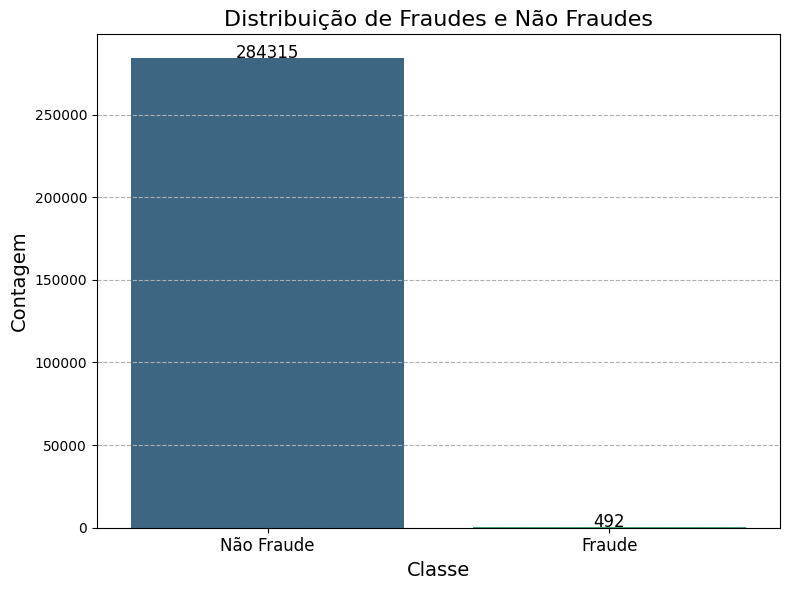

In [6]:
# Contar o número de fraudes e não fraudes
class_counts = df_credit['Class'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Adicionar título e rótulos
plt.title('Distribuição de Fraudes e Não Fraudes', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Adicionar legendas
plt.xticks(ticks=[0, 1], labels=['Não Fraude', 'Fraude'], fontsize=12)

# Adicionar valor das contagens acima das barras
for i in range(len(class_counts)):
    plt.text(i, class_counts[i] + 10, class_counts[i], ha='center', fontsize=12)

# Exibir gráfico
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Melhora o espaçamento
plt.show()

## Análise da Distribuição de Fraudes e Não Fraudes

Podemos observar  no gráfico que há uma distribuição significativamente desigual entre os casos de fraudes e não fraudes. O número de fraudes em transações é muito menor do que o de transações não fraudulentas, o que pode levar a um viés no treinamento do modelo. Isso significa que, se não tratarmos essa desproporção, o modelo pode aprender a prever apenas a classe casos de não fraude, o que tornaria o tornaria inútil para nossa aplicação.

Inicialmente, eu planejava reduzir a quantidade de dados de não fraudes para equilibrar o conjunto de dados, utilizando uma abordagem de subamostragem. Contudo, após aprender sobre a técnica SMOTE (Synthetic Minority Over-sampling Technique), percebi que essa seria uma solução mais adequada. A técnica SMOTE cria novas amostras sintéticas da classe minoritária (fraude), permitindo que o modelo seja treinado de maneira mais eficaz, sem perder informações valiosas da classe majoritária.

[Mais sobre a técnica SMOTE](https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/smote?view=azureml-api-2)

In [7]:
# 3. Pré-processamento e Balanceamento de Dados
X = df_credit.drop(['Class', 'Time'], axis=1)
y = df_credit['Class']

In [8]:
# Aplicar o SMOTE para balancear o dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [9]:
# Verificar a nova distribuição das classes após o balanceamento
print("\nDistribuição de Classes Após SMOTE:")
print(y_res.value_counts())


Distribuição de Classes Após SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [10]:
# 4. Separação dos Dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [11]:
# 5. Treinamento do Modelo de Regressão Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# 6. Avaliação do Modelo
# Previsão e acurácia no conjunto de teste
pred_test = lr.predict(X_test)
acc = accuracy_score(y_test, pred_test)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

In [13]:
print(f"\nAcurácia do Modelo: {acc * 100:.2f}%")
print(f"AUC-ROC: {roc_auc:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, pred_test))


Acurácia do Modelo: 95.97%
AUC-ROC: 0.99

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



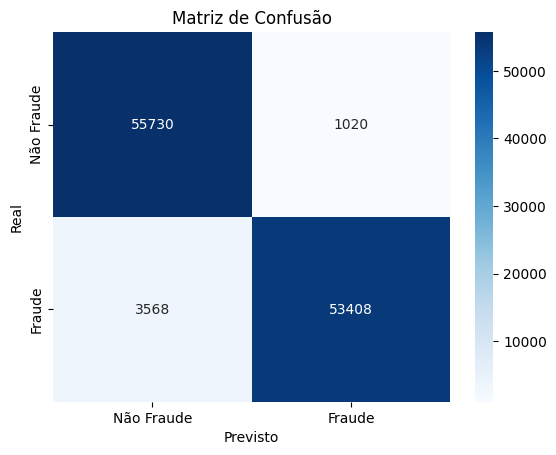

In [14]:
# Matriz de Confusão
cm = confusion_matrix(y_test, pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

In [15]:
# 7. Validação Final em um Conjunto de Validação
# Seleção de uma amostra de validação de fraudes e não fraudes
df_val_nao_fraude = df_credit[df_credit['Class'] == 0].sample(n=5, random_state=42)
df_val_fraude = df_credit[df_credit['Class'] == 1].sample(n=5, random_state=42)
df_val_total = pd.concat([df_val_nao_fraude, df_val_fraude])
df_val_total = df_val_total.reset_index(drop=True)

In [16]:
# Separação das features e labels
X_val = df_val_total.drop(['Class', 'Time'], axis=1)
y_val = df_val_total['Class']

In [17]:
# Previsão na validação
pred_val = lr.predict(X_val)
df_val_total['Previsão'] = pred_val

In [18]:
# Mostrar resultados de validação
print("\nResultados de Validação:")
print(df_val_total[['Class', 'Previsão']])


Resultados de Validação:
   Class  Previsão
0      0         0
1      0         0
2      0         0
3      0         0
4      0         0
5      1         1
6      1         1
7      1         1
8      1         1
9      1         1


In [19]:
# Acurácia na validação
acc_val = accuracy_score(y_val, pred_val)
print(f"\nAcurácia na Validação: {acc_val * 100:.2f}%")


Acurácia na Validação: 100.00%
